In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
titanic = pd.read_csv("/content/train.csv")

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic = titanic.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)

In [7]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
sns.set()

<Axes: xlabel='Sex', ylabel='Survived'>

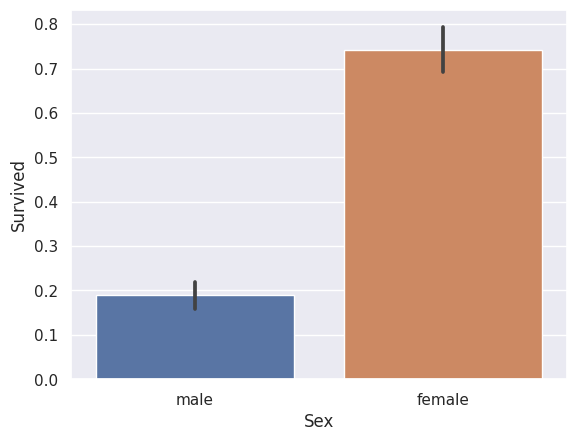

In [9]:
sns.barplot(x='Sex', y ='Survived', data=titanic)

<Axes: xlabel='Embarked', ylabel='Survived'>

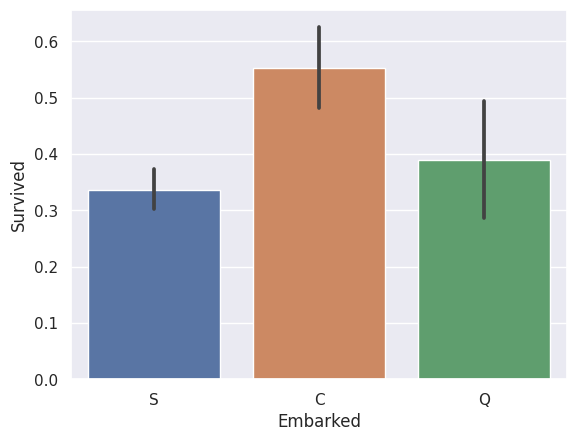

In [10]:
sns.barplot(x='Embarked', y ='Survived', data=titanic)

<Axes: xlabel='Pclass', ylabel='Survived'>

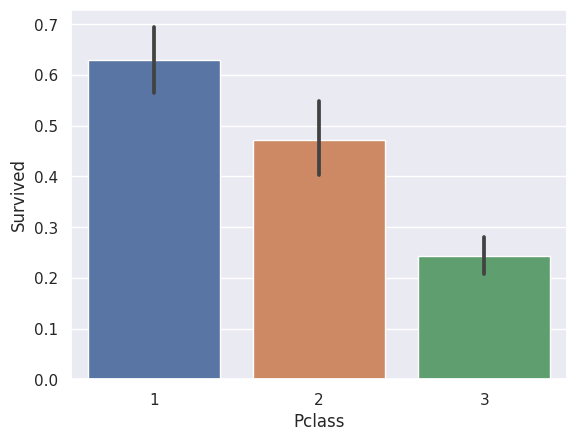

In [12]:
sns.barplot(x='Pclass', y ='Survived', data=titanic)

<Axes: xlabel='Parch', ylabel='Survived'>

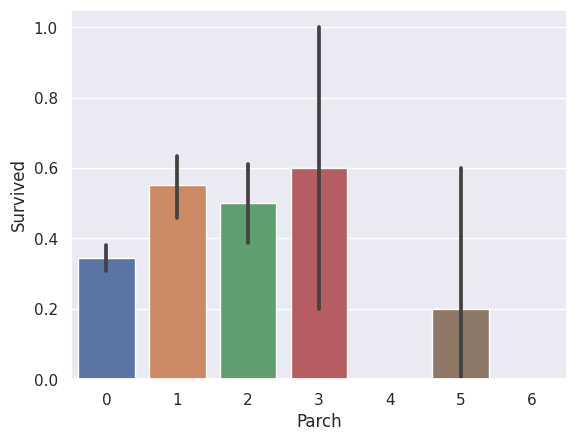

In [13]:
sns.barplot(x='Parch', y ='Survived', data=titanic)

<Axes: xlabel='SibSp', ylabel='Survived'>

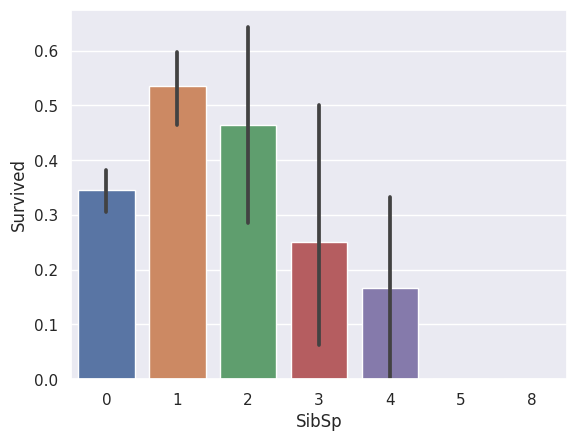

In [15]:
sns.barplot(x='SibSp', y ='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

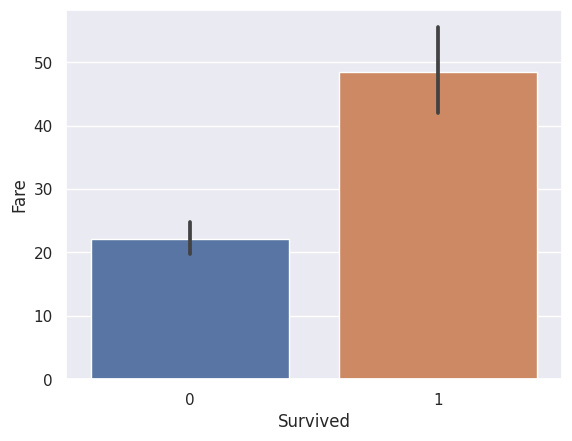

In [17]:
sns.barplot(y='Fare', x ='Survived', data=titanic)

In [20]:
# Handling missing values

titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)

In [22]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
titanic['Embarked'].fillna(value=titanic['Embarked'].mode()[0], inplace=True)

In [31]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

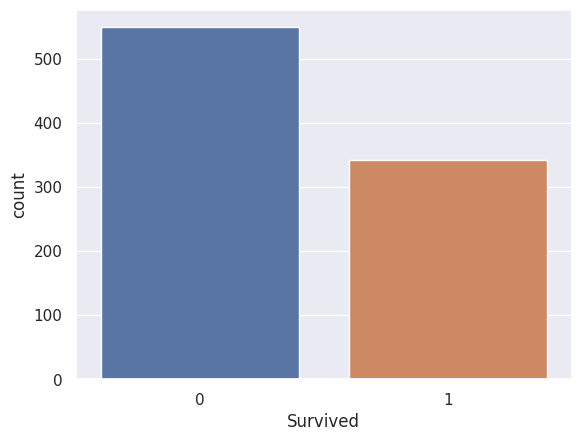

In [34]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

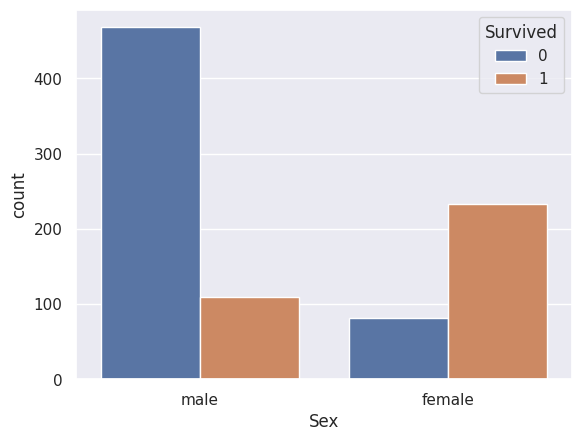

In [36]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

In [37]:
encoder = LabelEncoder()

In [40]:
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])

In [41]:
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])

In [42]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [43]:
X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 3)

In [45]:
regressor = LogisticRegression()

In [46]:
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predict_train = regressor.predict(X_train)
accuracy_train = accuracy_score(Y_train, predict_train)
accuracy_train

0.8103932584269663

In [49]:
predict_test = regressor.predict(X_test)
accuracy_test = accuracy_score(Y_test, predict_test)
accuracy_test

0.7597765363128491